## Fitting a logistic regression model using Titanic dataset

In [1]:
#import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import titanic dataset
url="https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic=pd.read_csv(url)
titanic.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# titanic information
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#statistical summary
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#checking for null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# dropping some irrelevant features from our dataset
titanic.drop(['PassengerId','SibSp','Parch','Ticket','Embarked','Cabin'],axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500


In [7]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
Fare          0
dtype: int64

## Checking for outliers

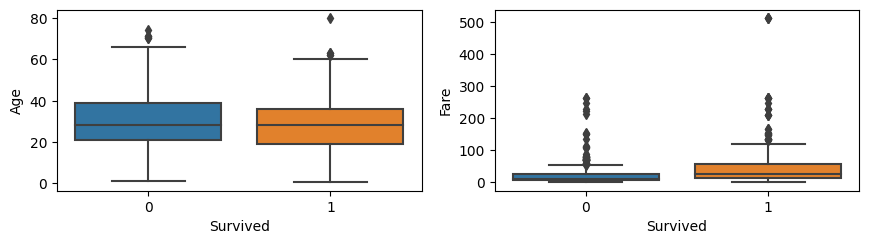

In [8]:
## Drawing Boxplot for Age and Fare
plt.figure(figsize=(16,8))
columns=['Age','Fare']
for i, column in enumerate(columns, 1):
    plt.subplot(3,3,i)
    sns.boxplot(x='Survived',y=column,data=titanic)

## Imputing Age column using median

In [9]:
from sklearn.impute import SimpleImputer
columns_impute=['Age','Fare']
imputer=SimpleImputer(strategy="median")
imputeddata=imputer.fit_transform(titanic[columns_impute])
data=pd.DataFrame(imputeddata,columns=columns_impute)
titanic=pd.concat([titanic.drop(columns=columns_impute),data],axis=1)
titanic

,Survived,Pclass,Name,Sex,Age,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500
...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,23.4500
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000


In [10]:
#checking for nullvalues after imputation
titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
Fare        0
dtype: int64

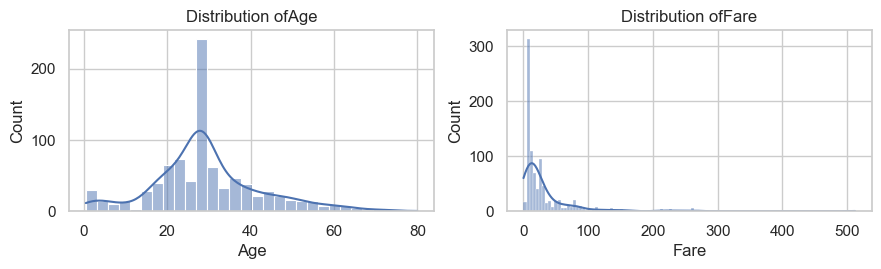

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,8))
columns=['Age','Fare']
for i, column in enumerate(columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(titanic[column],kde=True)
    plt.title(f'Distribution of{column}')


## Encoding categorical variable Sex

In [12]:

titanic=pd.get_dummies(data=titanic,columns=['Sex'])
titanic

,Survived,Pclass,Name,Age,Fare,Sex_female,Sex_male
0,0,3,"Braund, Mr. Owen Harris",22.0,7.2500,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,True,False
2,1,3,"Heikkinen, Miss. Laina",26.0,7.9250,True,False
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,True,False
4,0,3,"Allen, Mr. William Henry",35.0,8.0500,False,True
...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,13.0000,False,True
887,1,1,"Graham, Miss. Margaret Edith",19.0,30.0000,True,False
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,23.4500,True,False
889,1,1,"Behr, Mr. Karl Howell",26.0,30.0000,False,True


## Feature Scaling Independent features

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
colums_to_scale=['Pclass','Age','Fare','Sex_female','Sex_male'] 
scaled_data=scaler.fit_transform(titanic[colums_to_scale])
scaled_df=pd.DataFrame(scaled_data,columns=colums_to_scale)
titanic=pd.concat([titanic.drop(columns=colums_to_scale),scaled_df],axis=1)
titanic

,Survived,Name,Pclass,Age,Fare,Sex_female,Sex_male
0,0,"Braund, Mr. Owen Harris",0.827377,-0.565736,-0.502445,-0.737695,0.737695
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",-1.566107,0.663861,0.786845,1.355574,-1.355574
2,1,"Heikkinen, Miss. Laina",0.827377,-0.258337,-0.488854,1.355574,-1.355574
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",-1.566107,0.433312,0.420730,1.355574,-1.355574
4,0,"Allen, Mr. William Henry",0.827377,0.433312,-0.486337,-0.737695,0.737695
...,...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",-0.369365,-0.181487,-0.386671,-0.737695,0.737695
887,1,"Graham, Miss. Margaret Edith",-1.566107,-0.796286,-0.044381,1.355574,-1.355574
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",0.827377,-0.104637,-0.176263,1.355574,-1.355574
889,1,"Behr, Mr. Karl Howell",-1.566107,-0.258337,-0.044381,-0.737695,0.737695


## Splitting independent features and target

In [14]:
X=titanic[['Pclass','Age','Fare','Sex_female','Sex_male']]
Y=titanic['Survived']

In [15]:
X.shape,Y.shape

((891, 5), (891,))

## Target Distribution

In [16]:
Y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

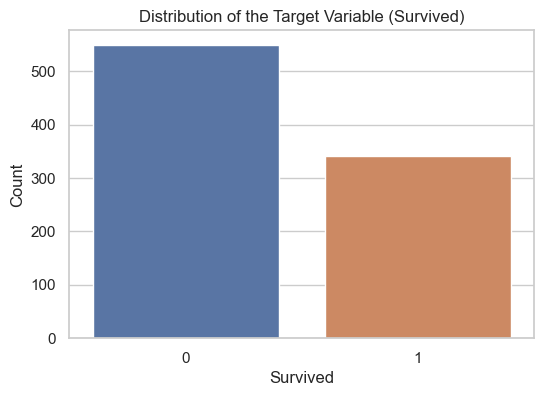

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic)
plt.title('Distribution of the Target Variable (Survived)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

## Splitting Training and Testing Data

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2)

In [19]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", Y_train.shape)
print("y_test shape:", Y_test.shape)

X_train shape: (712, 5)
X_test shape: (179, 5)
y_train shape: (712,)
y_test shape: (179,)


## Logistic Regression model

In [20]:
from sklearn.linear_model import LogisticRegression
logisticmodel = LogisticRegression()
logisticmodel.fit(X_train, Y_train)

LogisticRegression()

## Evaluation metrics

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
Y_train_pred = logisticmodel.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.7935393258426966


In [22]:
class_report_train = classification_report(Y_train, Y_train_pred)
print("\nClassification Report (Training):\n", class_report_train)


Classification Report (Training):
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       445
           1       0.73      0.72      0.72       267

    accuracy                           0.79       712
   macro avg       0.78      0.78      0.78       712
weighted avg       0.79      0.79      0.79       712



## Model accuracy 

In [23]:
Y_test_pred=logisticmodel.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.7877094972067039


In [24]:
score = logisticmodel.score(X_test, Y_test)
score

0.7877094972067039

In [25]:
class_report_test = classification_report(Y_test, Y_test_pred)
print("\nClassification Report (Testing):\n", class_report_test)


Classification Report (Testing):
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       104
           1       0.75      0.73      0.74        75

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



Text(42.24999999999999, 0.5, 'true label')

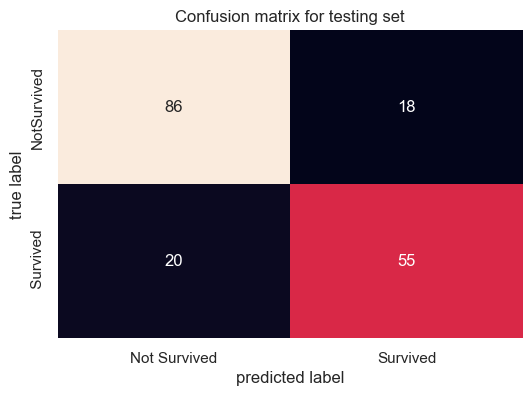

In [26]:
cm=confusion_matrix(Y_test, Y_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap( cm,annot=True ,cbar=False,xticklabels=["Not Survived","Survived"],yticklabels= ["NotSurvived"," Survived"])
plt.title("Confusion matrix for testing set")
plt.xlabel("predicted label")
plt.ylabel("true label")
